In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\jayes\Downloads\scholarship.csv")
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [3]:
df.shape

(1000, 3)

# OUTLIER DETECTION USING Z-SCORE 
## to use z_score we must insure that we data should be normally distributed

C:\Users\jayes\AppData\Local\Temp\ipykernel_8836\1737763189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'])
C:\Users\jayes\AppData\Local\Temp\ipykernel_8836\1737763189.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])


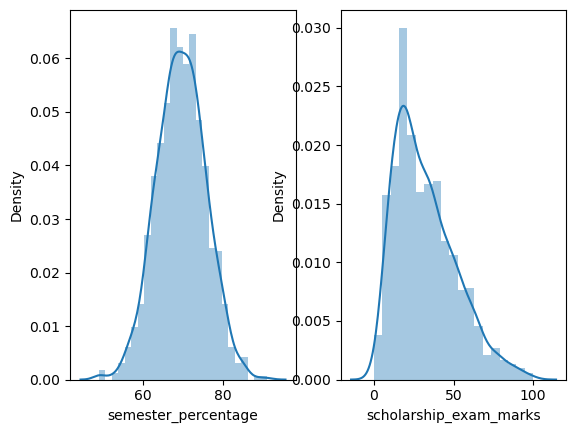

In [4]:
plt.subplot(1,2,1)
sns.distplot(df['semester_percentage'])
plt.subplot(1,2,2)
sns.distplot(df['scholarship_exam_marks'])
plt.show()

In [5]:
mean=df['semester_percentage'].mean()
std=df['semester_percentage'].std()

In [6]:
print(mean,':',std)

69.6124 : 6.158978751323897


In [7]:
highest_allowed = mean + 3*std
lowest_allowed = mean - 3*std

In [8]:
print(highest_allowed,':',lowest_allowed)

88.08933625397168 : 51.13546374602831


In [9]:
df[(df['semester_percentage']<lowest_allowed ) | (df['semester_percentage']>highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


# Trimming

In [10]:
df1=df[(df['semester_percentage']>lowest_allowed ) & (df['semester_percentage']<highest_allowed)]

In [11]:
df1

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


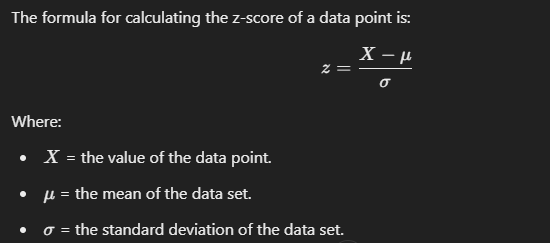

In [12]:
df['z_score']=(df['semester_percentage']-df['semester_percentage'].mean())/df['semester_percentage'].std()

In [13]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [14]:
df[(df['z_score']<-3) | (df['z_score']>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [15]:
df2=df[(df['z_score']>-3) & (df['z_score']<3)]

In [16]:
df2

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


# Capping

In [19]:
upper_limit = mean + 3*std
lower_limit = mean - 3*std
df["semester_percentage"] =np.where(df["semester_percentage"]>upper_limit,upper_limit,
         np.where(df["semester_percentage"]<lower_limit, lower_limit, df["semester_percentage"] ))

In [21]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


# OUTLIER DETECTION USING IQR METHOD 
## to use IQR method we must insure that we data should be skewed

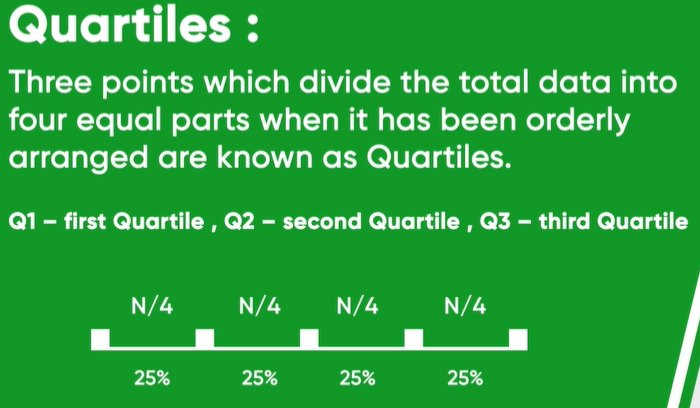

### IQR = Q3-Q1 and the value which are below Q1-1.5*IQR and above Q3+1.5*IQR are outliers

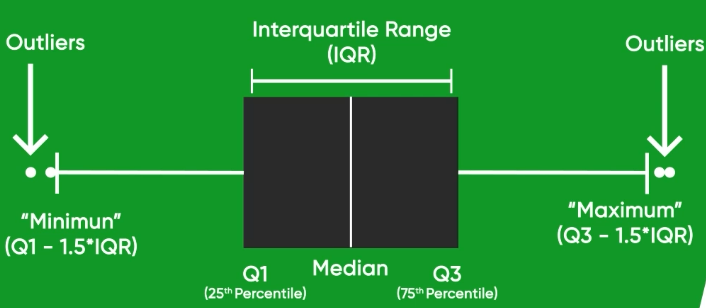

C:\Users\jayes\AppData\Local\Temp\ipykernel_8836\1565889564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])


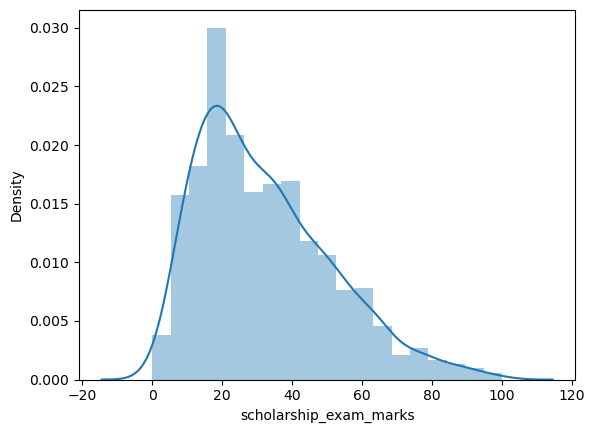

In [22]:
sns.distplot(df['scholarship_exam_marks'])
plt.show()

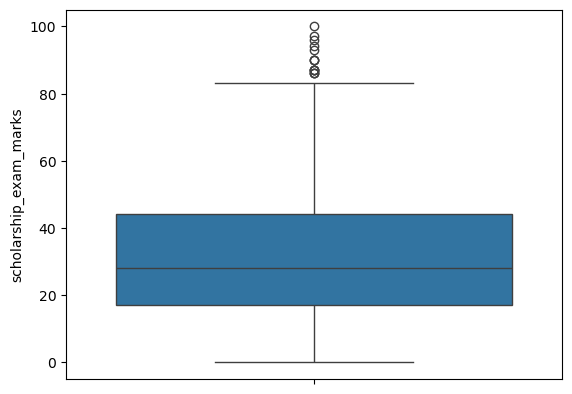

In [23]:
sns.boxplot(df['scholarship_exam_marks'])
plt.show()

In [24]:
Q1= df['scholarship_exam_marks'].quantile(0.25)
Q3= df['scholarship_exam_marks'].quantile(0.75)

In [25]:
Q1

17.0

In [26]:
Q3

44.0

In [27]:
IQR=Q3-Q1

In [28]:
min= Q1 - 1.5*IQR
max= Q3 + 1.5*IQR

In [29]:
min

-23.5

In [30]:
max

84.5

In [31]:
df[(df['scholarship_exam_marks'] < min) | (df['scholarship_exam_marks'] > max) ]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
9,77.5,94,1,1.280667
40,66.0,86,1,-0.586526
61,75.1,86,0,0.890992
134,63.3,93,0,-1.024910
162,78.0,90,0,1.361849
283,70.9,87,0,0.209061
290,83.8,87,0,2.303564
311,69.7,87,1,0.014223
324,66.4,90,0,-0.521580
630,65.6,96,1,-0.651472


# Trimming

In [33]:
df3 = df[(df['scholarship_exam_marks'] > min) & (df['scholarship_exam_marks'] < max) ]

In [34]:
df3

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


C:\Users\jayes\AppData\Local\Temp\ipykernel_8836\1187822754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])
C:\Users\jayes\AppData\Local\Temp\ipykernel_8836\1187822754.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['scholarship_exam_marks'])


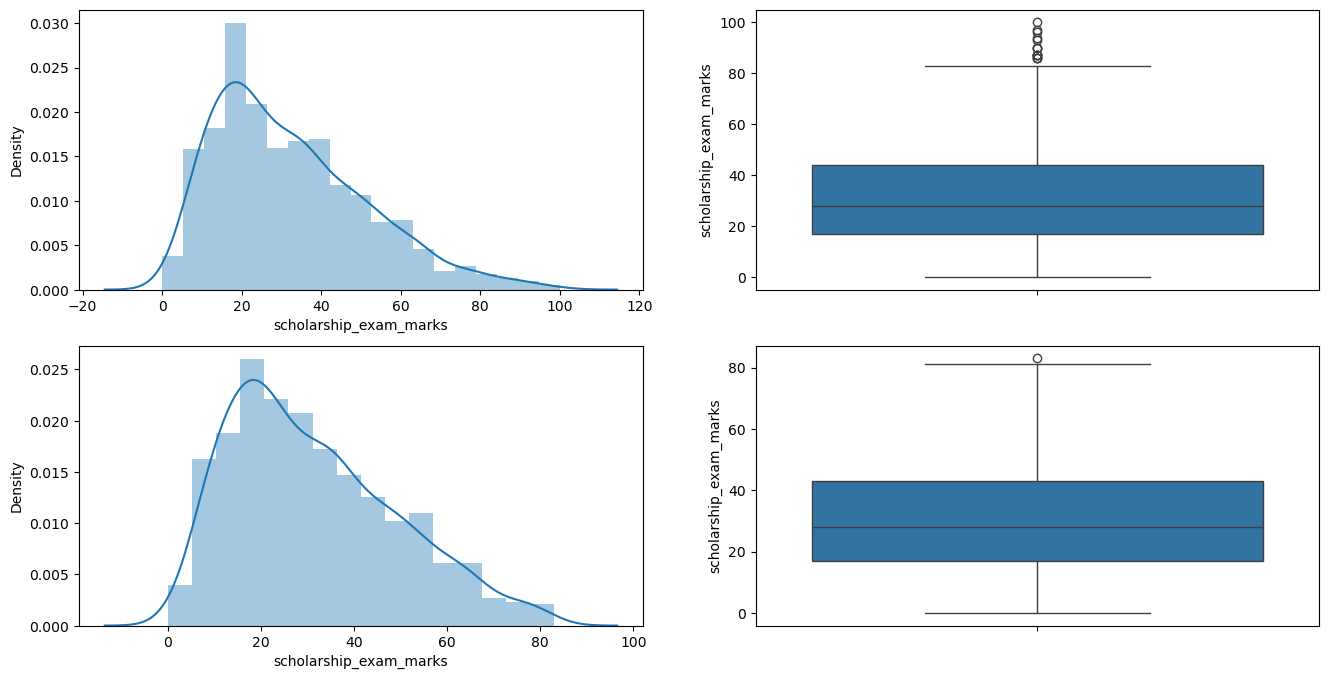

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['scholarship_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['scholarship_exam_marks'] )
plt.subplot(2,2,3)
sns.distplot(df3['scholarship_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(df3['scholarship_exam_marks'] )
plt.show()

# Capping

In [40]:
df4=df.copy()

In [41]:
df4['scholarship_exam_marks']=np.where(df4['scholarship_exam_marks']>max,max , 
                                      np.where(df4['scholarship_exam_marks']<min,min,df4['scholarship_exam_marks']))

In [43]:
df4.shape

(1000, 4)

<Axes: ylabel='scholarship_exam_marks'>

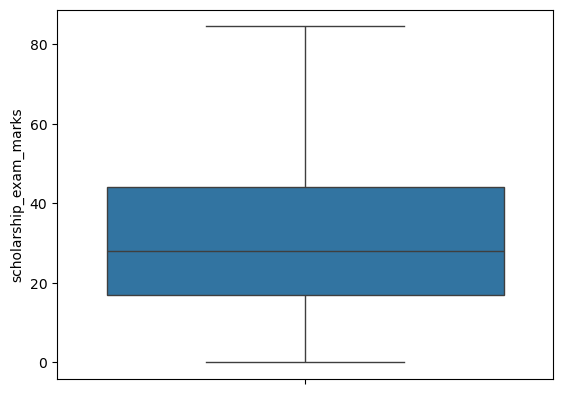

In [45]:
sns.boxplot(df4['scholarship_exam_marks'])